<a href="https://colab.research.google.com/github/deviljerry/Visualizing-Feature-Maps-and-Filters/blob/main/Visualizing_Feature_Maps_and_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==========================================
# Visualizing Feature Maps and Filters
# ==========================================
# Author: Qasim Naveed
# Course: Deep Learning | Instructor: Dr. Osama
# ------------------------------------------

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# ------------------------------------------
# Device configuration (GPU or CPU)
# ------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Running on: {device}")

✅ Running on: cuda


100%|██████████| 170M/170M [00:03<00:00, 48.3MB/s]


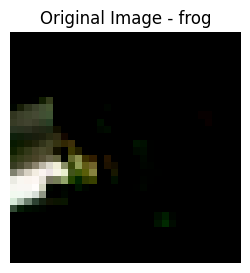

In [3]:
# ------------------------------------------
# Step 1: Load dataset (CIFAR-10)
# ------------------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# Select one test image
image, label = testset[7]
plt.figure(figsize=(3, 3))
plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
plt.title(f"Original Image - {classes[label]}")
plt.axis("off")
plt.show()


In [4]:
# ------------------------------------------
# Step 2: Define a CNN model (for demonstration)
# ------------------------------------------
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel().to(device)
print("✅ CNN model initialized successfully.")

✅ CNN model initialized successfully.



🔍 Visualizing Conv1 Feature Maps...


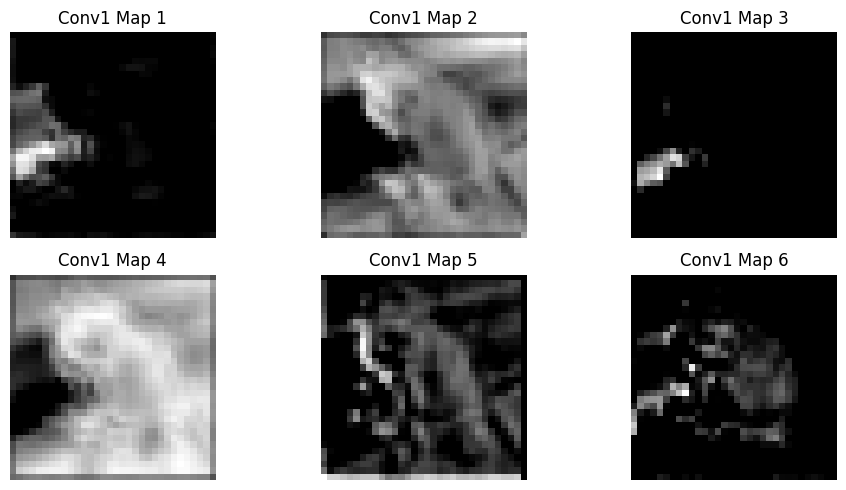


🔍 Visualizing Conv2 Feature Maps...


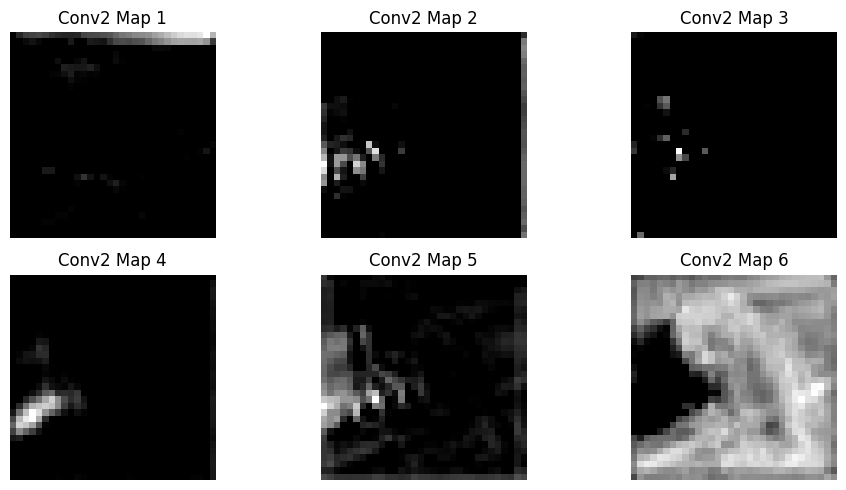

In [5]:
# ------------------------------------------
# Step 3: Visualize intermediate feature maps
# ------------------------------------------
def visualize_feature_maps(model, image):
    model.eval()
    with torch.no_grad():
        x = image.unsqueeze(0).to(device)
        conv1_out = F.relu(model.conv1(x))
        conv2_out = F.relu(model.conv2(conv1_out))

    # Visualize Conv1 Feature Maps
    print("\n🔍 Visualizing Conv1 Feature Maps...")
    plt.figure(figsize=(10, 5))
    for i in range(min(6, conv1_out.shape[1])):
        plt.subplot(2, 3, i + 1)
        plt.imshow(conv1_out[0, i].cpu().numpy(), cmap='gray')
        plt.title(f'Conv1 Map {i+1}')
        plt.axis("off")
    plt.tight_layout()
    plt.show()

    # Visualize Conv2 Feature Maps
    print("\n🔍 Visualizing Conv2 Feature Maps...")
    plt.figure(figsize=(10, 5))
    for i in range(min(6, conv2_out.shape[1])):
        plt.subplot(2, 3, i + 1)
        plt.imshow(conv2_out[0, i].cpu().numpy(), cmap='gray')
        plt.title(f'Conv2 Map {i+1}')
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Run visualization
visualize_feature_maps(model, image)


🎨 Visualizing Learned Filters (Conv1)...


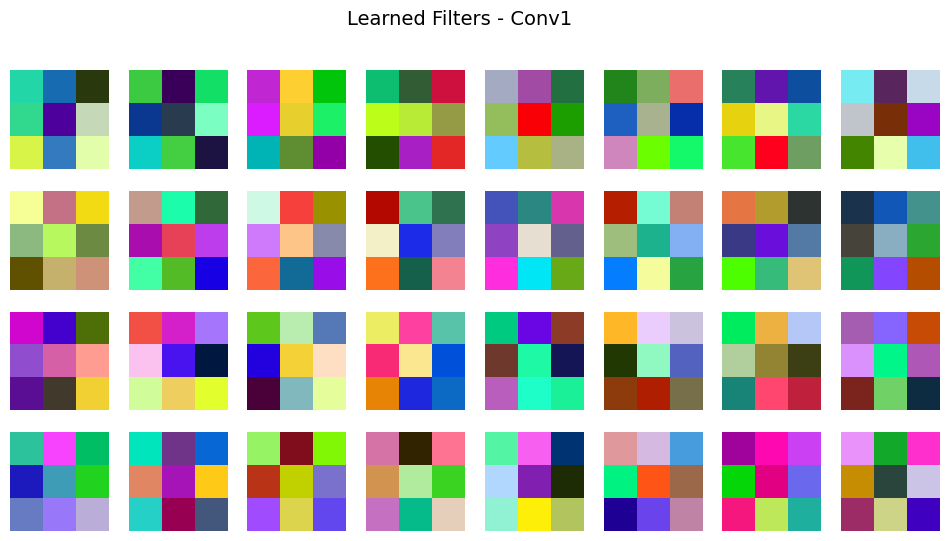

In [6]:
# ------------------------------------------
# Step 4: Visualize learned filters (kernels)
# ------------------------------------------
print("\n🎨 Visualizing Learned Filters (Conv1)...")
filters = model.conv1.weight.data.clone().cpu()

fig, axarr = plt.subplots(4, 8, figsize=(12, 6))
for idx in range(min(32, filters.shape[0])):
    f = filters[idx].permute(1, 2, 0).numpy()
    f = (f - f.min()) / (f.max() - f.min() + 1e-5)  # Normalize to [0, 1]
    axarr[idx // 8, idx % 8].imshow(f)
    axarr[idx // 8, idx % 8].axis('off')
plt.suptitle('Learned Filters - Conv1', fontsize=14)
plt.show()

In [7]:
# ------------------------------------------
# Step 5: Interpretation
# ------------------------------------------
print("""
🧠 Interpretation
----------------------------
1️⃣ Conv1 Layer:
   - Detects low-level features such as **edges**, **lines**, and **simple color gradients**.
   - These are the foundational features that describe object outlines or basic shapes.

2️⃣ Conv2 Layer:
   - Detects more **complex features** like **textures, corners, and small object parts**.
   - It combines the patterns learned in Conv1 to represent higher-level details.

3️⃣ Learned Filters:
   - Each filter represents a unique pattern detector.
   - During training, these filters adjust automatically to identify the most useful visual patterns.

✅ Overall:
   CNNs learn a hierarchy of features — from simple edges in early layers to complex shapes in deeper layers.
""")



🧠 Interpretation
----------------------------
1️⃣ Conv1 Layer:
   - Detects low-level features such as **edges**, **lines**, and **simple color gradients**.
   - These are the foundational features that describe object outlines or basic shapes.

2️⃣ Conv2 Layer:
   - Detects more **complex features** like **textures, corners, and small object parts**.
   - It combines the patterns learned in Conv1 to represent higher-level details.

3️⃣ Learned Filters:
   - Each filter represents a unique pattern detector.
   - During training, these filters adjust automatically to identify the most useful visual patterns.

✅ Overall:
   CNNs learn a hierarchy of features — from simple edges in early layers to complex shapes in deeper layers.

